In [1]:
"""
1. Welcher lineare Algorithmus für großes n ?
    stoch Gradient oder Minibatch optimal

2. Welche Algorithmen sind anfällig bei unterschiedlich starker Featurevarianz ?
    Sämtliche Gradientenverfahren, da diese im Featureraum eine Parable statt einer Geraden verfolgen müssen.
    Dies ist im 2D Featureraum bereits deutlich, wird bei n>>2 sehr schnell zum erheblichen Problem.
    
3. Kann Gradientenverfahren in lokalen Minima stecken bleiben ?
    Ja, durch die konstanten bzw. sich leicht reduzierenden Schritte bei der Regression kann durch den stetigen
    Fokus auf die Kehrrichtung der höchsten Steigung auch ein lokales Minimum angesteuert werden.

4. Führen alle Algorithmen bei Gradientenverfahren bei genügend Iterationen zum gleichen Modell?
    Nein. Stochastische oder Mini-Batch Verfahren können nie so genau sein wie Batch Gradientenverfahren arbeiten.
    Theoretisch ist das Erreichen des gleichen Modells möglich, würde jedoch eher mit Zufall einhergehen wenn
    die letzte Iteration des Stoch/Mini-Batch Verfahrens genau auf dem Minimum liegt.

5. Validierungsfehler steigt beim Batch-Verfahren. Ursache und Remedy?
    Ursache: Schrittgröße zu hoch gewählt, daher divergiert das Modell. Die Schrittgröße sollte schrittweise
    verringert werden. Weitere Ursache könnte das nichterreichen des globelen Maximums sein, i.d.F. muss
    die Schrittgröße erhöht werden

6. Mini-Batch Gradientenverfahren stoppen, wenn erhöhter Validierungsfehler im Prozess?
    Nein, da dieser auch temporär "pendeln" kann. Das Verfahren sollte erst gestoppt werden wenn der Validierungsfehler
    dauerhaft über einem zuvor erreichten Minimum liegt.

7. Schnellster Algorithmus? Konvergierender Algorithmus? Wie konvergieren auch andere Algorithmen?
    Der schnellste Algorithmus ist das stochastische Gradientenverfahren. 
    Konvergierend verhalten sich Batch- und Mini-Batch.
    Man kann stochastische Algorithmen auch zum sicheren Konvergieren bewegen wenn man die Schrittgröße mit 
    der Anzahl der Schritte reduziert. Dies erfordert jedoch hohe Sorgfalt, da eine falsche gewählte Schrittgröße
    in immenser Rechenzeit (zu langsame Reduktion)oder nichterreichen des globalen Minimums (zu schnelle Reduktion)
    resultieren kann.

8. Erheblicher Unterschied zw. Trainings- und Validierungsfehler bei polynomieller Regression. Ursache und 3x Remedy?
    Der Unterschied deutet auf Over- oder Underfitting hin.
    Bei Overfitting:    (Validierungsfehler höher als Trainingsfehler)
                        -Einfacheres Modell nutzen. Z.B. quadratisch oder linear statt polynomiell
                        -Regularisierung des Modells erhöhen
    Bei Underfitting:   (Validierungsfehler volatil zum Trainingsfehler)
                        -Daten nochmals prüfen, auf Ausreiser oder zu skalierende Features
                        -komplexeres Modell verwenden

9. Trainingsfehler=Validierungsfehler aber sehr hoch bei Ridge Modell. Ursache: Hoher Bias oder hohe Varianz? Erhöhung oder
Reduktion des Regularisierungsparamters alpha?
    Wenn der Fehler bei beiden Datensätzen hoch ist liegt eindeutig Underfitting vor, wahrscheinlich durch einen hohen Bias.
    Bias ergibt sich wenn das Modell zu simpel oder zu stark reguliert wurde. In dem Fall sollte der Parameter alpha stück-
    weise gesenkt werden bis der Fehler auf ein zufriedenstellendes Niveau (je nach zu bearbeitendem Problem individuell) und
    bei Training- und Validierungsdaten angepasst wurde.

10. Vorzüge von Regularisierungsmodellen
    a) Ridge vs linear
        Lineare Modelle neigen meist zu underfitting. Eine Ridge Regularisierung dagegen kann helfen eine Regression die sehr
        nahe an ein lineare R. kommt, jedoch entscheident präziser ist falls die Daten nicht perfekt linear sind.
    b) Lasso vs Ridge
        Durch die Lasso Regression werden unwichtige Merkmale sehr schnell nahezu vollständig eliminiert und das Modell daher
        stärker vereinfacht.
    c) Elastic Net vs Lasso
        Das Elastic Net kann die Vor und Nachteile zwischen Lasso und Ridge Regularisierung ausgleichen. Hauptvorteil ist jedoch,
        dass das Elastic Net trotz stärkerer Vereinfachung als das Ridgemodell dennoch zuverlässig konvergiert.

11. Bester Klassifikator für doppelte Unterscheidung: innen/außen und Tag/Nacht
    Besser zwei verschiedene lineare Regressoren, sich die beiden Unterscheidungen nicht gegenseitig ausschließen. Mögliche Kategorien sind
    innen-Tag/innen-Nacht und außen-Tag/außen-Nacht, also eine Ort-Zeit Kombi. Wir sollten also jeweils pro Eingabedatensatz zwei verschiedene Modelle über die
    Kategorie entscheiden lassen und beide Befunde dann kombinieren. Grund dafür ist, dass Softmax zwar mit vielen verschiedenen Eingaben
    und Ausgabemöglichkeiten arbeitet, jedoch nicht mehrere Ausgaben gleichzeitig produzieren kann.

12. Implementierung Batch-Gradientenverfahren mit Early Stopping für softmax Regression

"""

'\n1. Welcher lineare Algorithmus für großes m ?\n    Normalengleichung sowie SVD, da sie sich linear zur Erhöhung von m verhalten (O(m))\n    siehe Tabelle\n\n2. Welche Algorithmen sind anfällig bei unterschiedlich starker Featurevarianz ?\n    Sämtliche Gradientenverfahren, da diese im Featureraum eine Parable statt einer Geraden verfolgen müssen.\n    Dies ist im 2D Featureraum bereits deutlich, wird bei n>>2 sehr schnell zum erheblichen Problem.\n    \n3. Kann Gradientenverfahren in lokalen Minima stecken bleiben ?\n    Ja, durch die konstanten bzw. sich leicht reduzierenden Schritte bei der Regression kann durch den stetigen\n    Fokus auf die Kehrrichtung der höchsten Steigung auch ein lokales Minimum angesteuert werden.\n\n4. Führen alle Algorithmen bei Gradientenverfahren bei genügend Iterationen zum gleichen Modell?\n    Nein. Stochastische oder Mini-Batch Verfahren können nie so genau sein wie Batch Gradientenverfahren arbeiten.\n    Theoretisch ist das Erreichen des gleichen

[[3.97033123]
 [2.90977149]]


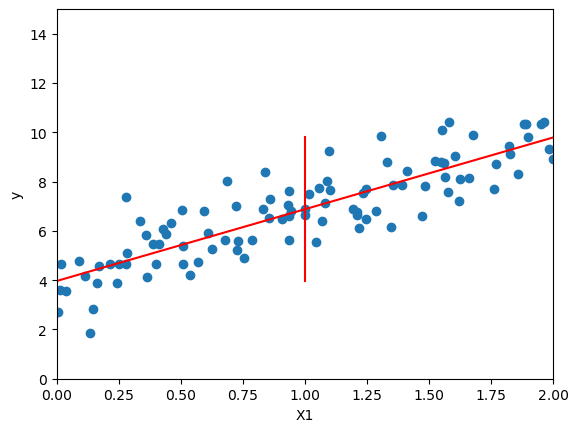

In [2]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
X = 2 * np.random.rand(m,1)
y = 4 + 3*X + np.random.randn(m,1)


X_b = np.c_[np.ones((m,1)),X] # adds the value of 1 to each data point
theta_formula = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # Vector an matrix operation according to the optimization formula

X_reg = np.c_[np.ones((2,1)),np.array([[0],[2]])] # Creating a vector to resemble our X
y_reg = X_reg.dot(theta_formula) # Use theta to calculate our optimal y value prediction

"""returns:
array([[15.04996267],
       [ 0.10063992]])

       not bad to estimate:
y = 15 + 0.1*X + np.random.randn(100,1)



theta_formula = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # Vector an matrix operation according to the optimization formula
X_reg = np.c_[np.ones((2,1)),np.array([[0],[2]])] # Creating a vector to resemble our X
y_reg = X_reg.dot(theta_formula)
plt.plot(X_or, y_or,"r")
"""
# Via Lineare Regression

plt.scatter(X,y)
plt.plot(X_reg, y_reg,"r")
plt.xlabel("X1")
plt.ylabel("y")
plt.axis([0,2,0,15])
plt.show


print(theta_formula)

Normal Batch Gradient theta [[3.94904634]
 [2.97586035]]
Stochastic Grad Theta [[4.04331757]
 [2.58760707]]


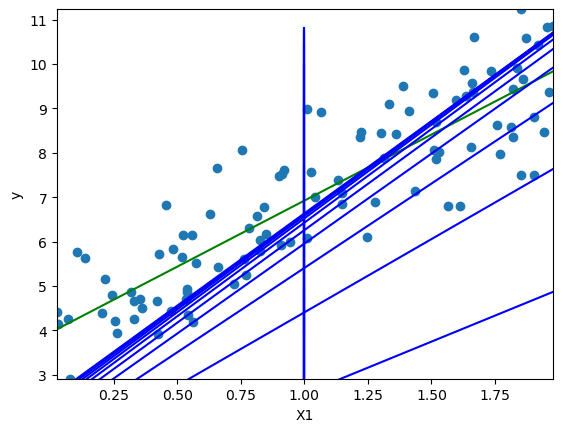

In [3]:
"""Implementation Of A Batch Gradient Algorithm"""
m = 100
X = 2 * np.random.rand(m,1)
y = 4 + 3*X + np.random.randn(m,1)
X_b = np.c_[np.ones((m,1)),X] # adds the value of 1 to each data point
theta_formula = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # Vector an matrix operation according to the optimization formula


eta = 0.1 # Learning rate
n_iterations = 10000 # Iterations of the algorithm
n_plots = 10

# m = dataset size
theta_grad = np.random.randn(2,1) # Random initializer (starting point)
theta_starting = theta_grad.copy()
theta_plots = theta_grad.copy()
plt.scatter(X,y)
plt.xlabel("X1")
plt.ylabel("y")
plt.axis([X.min(), X.max(), y.min(), y.max()])
##
X_or = np.c_[np.ones((2,1)),np.array([[0],[2]])] # Creating a vector to resemble our X
y_or = X_reg.dot(theta_formula) # Use theta to calculate our optimal y value prediction
plt.plot(X_reg, y_or,"g")
##

for iteration in range(n_plots):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta_plots) - y.reshape(-1, 1))
    theta_plots = theta_plots - eta * gradients
    X_reg = np.c_[np.ones((2,1)),np.array([[0],[2]])]
    y_reg = X_reg.dot(theta_plots)
    plt.plot(X_reg, y_reg,"b")

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta_grad) - y.reshape(-1, 1))
    theta_grad = theta_grad - eta * gradients
    

print("Normal Batch Gradient theta",theta_grad)


"""Stochastic Batch Method"""
n_epochs = 50
t0,t1 = 5,50
new_theta = np.random.randn(2,1)

def learning_schedule(t):
    return t0 / (t+t1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(new_theta)-yi)
        new_theta = new_theta - eta * gradients

print("Stochastic Grad Theta", new_theta)
new_theta2 = np.random.randn(2,1)

for iteration in range(n_plots):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    X_s = np.c_[np.ones((2,1)),np.array([[0],[2]])]
    gradients=2*xi.T.dot(xi.dot(new_theta2)-yi)
    y_s = X_s.dot(new_theta2)
    plt.plot(X_s, y_s,"y")



In [4]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X,y)
sgd_reg.intercept_,sgd_reg.coef_

c:\Users\MaxB2\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([3.94890076]), array([3.01806829]))

a= 8  b= 6  c= -5  average blur= -0.7249929128890724
a_pred= 7.1968424970722324  b_pred= 10.664867478603004  c_pred= -10.715189695709284  average blur= -0.7249929128890724


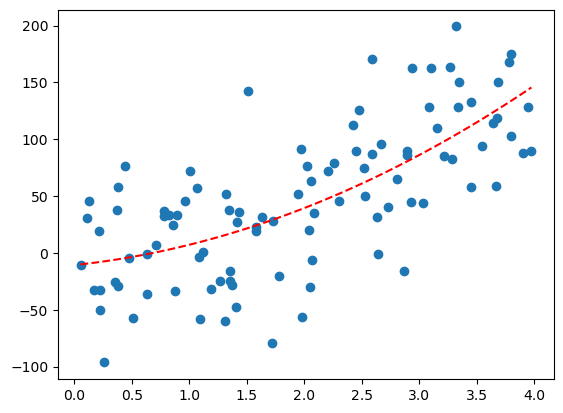

In [5]:
"""Polynomic Regression"""
import random as rd 

m = 100
# y = f(x) = ax^2 + bx + c
a= rd.randint(-10,10)
b= rd.randint(-10,10)
c= rd.randint(-10,10)
X = rd.randint(-10,10) * np.random.rand(m,1) + rd.randint(-5,5)
blur = np.random.randn(m,1)*rd.random()*rd.randint(10,100)
y = a*(X**2) + b*X + c + blur
print("a=",a," b=",b," c=",c," average blur=",np.mean(blur))
plt.scatter(X,y)

from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, include_bias=False)
X_poly = pf.fit_transform(X)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_poly, y)
a_pred = lr.coef_[0][1]
b_pred = lr.coef_[0][0]
c_pred = lr.intercept_[0]
X_samples = np.linspace(X.min(),X.max(),100)
y_pred = a_pred*(X_samples**2) + b_pred*X_samples + c_pred
##

##
plt.plot(X_samples,y_pred,"r--")

print("a_pred=",a_pred," b_pred=",b_pred," c_pred=",c_pred," average blur=",np.mean(blur))




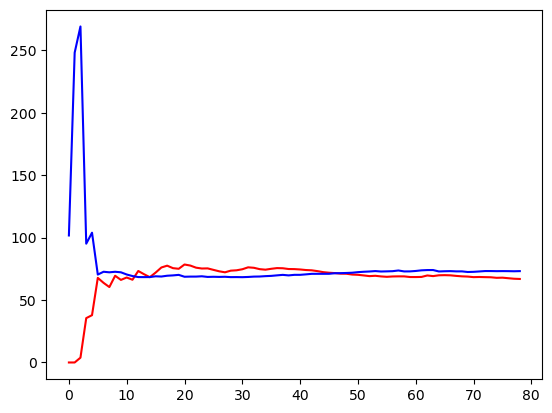

In [6]:
"""Learning Curve Evaluation"""
m = 100
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
mse = mean_squared_error

a= rd.randint(-10,10)
b= rd.randint(-10,10)
c= rd.randint(-10,10)
X = rd.randint(-10,10) * np.random.rand(m,1) + rd.randint(-5,5)
blur = np.random.randn(m,1)*rd.random()*rd.randint(10,100)
y = a*(X**2) + b*X + c + blur

def plot_learning_curves(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=694201337)
    train_errors, test_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mse(y_train[:m],y_train_predict))
        test_errors.append(mse(y_test,y_test_predict))
    plt.plot(np.sqrt(train_errors),"r-",label="Train Error")
    plt.plot(np.sqrt(test_errors),"b-",label="Test Error")
  
plot_learning_curves(lr,X,y)

(0.0, 100.0, 0.0, 100.0)

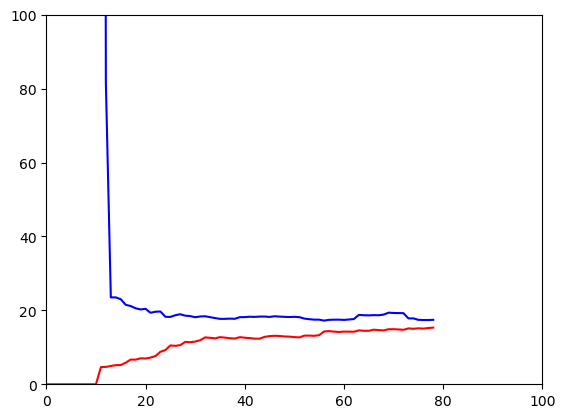

In [7]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features",PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", lr)
])

plot_learning_curves(polynomial_regression,X,y)
plt.axis([0, m, 0,100])


In [42]:
a= rd.randint(-10,10)
b= rd.randint(-10,10)
c= rd.randint(-10,10)
blur_base = rd.random()*rd.randint(10,20)
blur_extend = np.random.randn(m,1)*blur_base
X = rd.randint(-10,10) * np.random.rand(m,1) + rd.randint(-5,5)

y = a*(X**2) + b*X + c + blur_extend


chosen_X = rd.randint(int(X.min()),int(X.max()))
print("Chosen X to test: ", chosen_X)

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
y_ridge_pred = ridge_reg.predict([[chosen_X]])

sgd_l2 = SGDRegressor(penalty="l2")
sgd_l2.fit(X,y)
y_sgd_pred = sgd_l2.predict([[chosen_X]])

def interval(x,blurrer,A,B,C):
    ymin = A*(x**2) + B*x + C - blurrer
    ymax = A*(x**2) + B*x + C + blurrer
    return ymin, ymax

true_y = interval(chosen_X,blur_base,a,b,c)

print("a=",a," b=",b," c=",c)

print("Ridge prediction",y_ridge_pred)
print("SGD Predict: ", y_sgd_pred)
print("True Y interval: ", true_y)

def regression_plot(fitted_model,X,color):
    X_samples = np.linspace(X.min(),X.max(),100)
    y_predictions = fitted_model.predict(X_samples)
    plt.plot(X_samples,y_predictions,color)

regression_plot(ridge_reg,X,"r--")
regression_plot(sgd_l2,X,"g--")

plt.scatter(X,y)
plt.show()


Chosen X to test:  -3
a= 0  b= 8  c= 4
Ridge prediction [[-19.00075197]]
SGD Predict:  [-18.90913088]
True Y interval:  (-30.783433806213026, -9.216566193786973)


c:\Users\MaxB2\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Expected 2D array, got 1D array instead:
array=[-3.99527533e+00 -3.94531579e+00 -3.89535625e+00 -3.84539671e+00
 -3.79543716e+00 -3.74547762e+00 -3.69551808e+00 -3.64555854e+00
 -3.59559900e+00 -3.54563946e+00 -3.49567992e+00 -3.44572037e+00
 -3.39576083e+00 -3.34580129e+00 -3.29584175e+00 -3.24588221e+00
 -3.19592267e+00 -3.14596312e+00 -3.09600358e+00 -3.04604404e+00
 -2.99608450e+00 -2.94612496e+00 -2.89616542e+00 -2.84620588e+00
 -2.79624633e+00 -2.74628679e+00 -2.69632725e+00 -2.64636771e+00
 -2.59640817e+00 -2.54644863e+00 -2.49648909e+00 -2.44652954e+00
 -2.39657000e+00 -2.34661046e+00 -2.29665092e+00 -2.24669138e+00
 -2.19673184e+00 -2.14677230e+00 -2.09681275e+00 -2.04685321e+00
 -1.99689367e+00 -1.94693413e+00 -1.89697459e+00 -1.84701505e+00
 -1.79705551e+00 -1.74709596e+00 -1.69713642e+00 -1.64717688e+00
 -1.59721734e+00 -1.54725780e+00 -1.49729826e+00 -1.44733872e+00
 -1.39737917e+00 -1.34741963e+00 -1.29746009e+00 -1.24750055e+00
 -1.19754101e+00 -1.14758147e+00 -1.09762193e+00 -1.04766238e+00
 -9.97702843e-01 -9.47743301e-01 -8.97783760e-01 -8.47824218e-01
 -7.97864677e-01 -7.47905135e-01 -6.97945594e-01 -6.47986052e-01
 -5.98026511e-01 -5.48066970e-01 -4.98107428e-01 -4.48147887e-01
 -3.98188345e-01 -3.48228804e-01 -2.98269262e-01 -2.48309721e-01
 -1.98350179e-01 -1.48390638e-01 -9.84310966e-02 -4.84715551e-02
  1.48798633e-03  5.14475278e-02  1.01407069e-01  1.51366611e-01
  2.01326152e-01  2.51285694e-01  3.01245235e-01  3.51204776e-01
  4.01164318e-01  4.51123859e-01  5.01083401e-01  5.51042942e-01
  6.01002484e-01  6.50962025e-01  7.00921567e-01  7.50881108e-01
  8.00840649e-01  8.50800191e-01  9.00759732e-01  9.50719274e-01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Text(0, 0.5, 'probability Iris virginica')

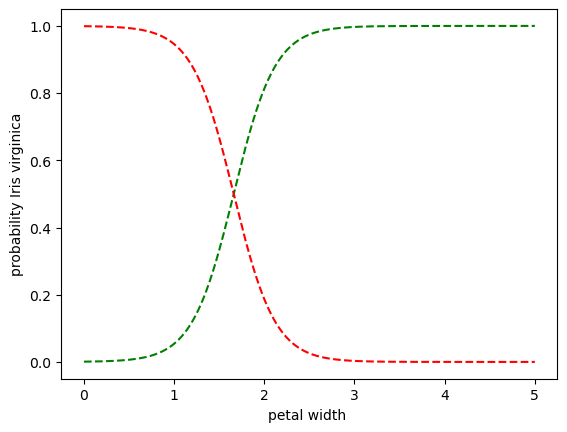

In [74]:
"""Visualizing Logistic Regression using one sample from Iris dataset"""
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:,3:]
y = (iris["target"] == 2).astype(int) # 1 if Iris virginica otherwise 0

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

X_n = np.linspace(0,5,1000).reshape(-1, 1)
y_p = log_reg.predict_proba(X_n)

plt.plot(X_n, log_reg.predict_proba(X_n)[:,1], "g--",label = "IS Iris virginica")
plt.plot(X_n, log_reg.predict_proba(X_n)[:,0], "r--",label = "NOT Iris virginica")

plt.xlabel("petal width ")
plt.ylabel("probability Iris virginica")


In [88]:
log_reg.predict([[1.67]])

array([1])

In [82]:
y_value_0


array([[9.99250016e-01, 7.49984089e-04]])